# Coronovirus Moscow Russia

This notebook was being made during the pandemic of COVID-19. Notebook had been started **at the beginning of April 2020**, before any good visualizations of Moscow COVID statistics were made, so the main aim was to look at the data and watch the spread of epidemic in Moscow, considering **restrictions imposed by government**:

- Since 30th of March: "Self-isolation (Holidays) mode" (Russia, including Moscow);
- Since 15th of April: Permits for moving around the Moscow (public and personal transport);
- Since 12th of May: Mandatory wearing of masks and gloves (in public places and transport);


## Data sources:

- [official site](https://стопкоронавирус.рф/)
- [yandex stats](https://yandex.ru/covid19/stat?utm_source=main_graph&geoId=213)
- [lentach telegram channel](https://t.me/lentachold)
- [wiki about epedemic in Russia](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_COVID-19_%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8)
- [John Hopkins University data](https://coronavirus.jhu.edu/map.html)


## Comments:

- There are data about new infected cases and tests made:
    - sinse 6th of March 2020;
- Due to the noise of data in first month of epidemic (March 2020) meaningfull statistics about tests were made sinse 15th-30th of March 2020;
- new cases data was collected about:
    - Moscow;
    - Moscow Region (MR);
    - Saint Petersburg (SPB);
    - Leningrad region (LR);
    - Russia;
- Number of tests made by russian regions is not available, there was only aggregated russian number of tests, so **number of tests in regions is an estimate**;
- Num of tests in region = russia_new_tests * region_new_cases / russia_new_cases;
- Detection rate in russia = "new cases daily"/ "new tests daily"
- Several days were missing, so interpolation was made.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('seaborn-poster')
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)

%matplotlib inline

/home/mikhail/_projects/general-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Data processing
- Data load
- filling missing days
- tests by region estimation

In [2]:
data = pd.read_excel('data/coronovirus_stats_data.xlsx')

# interpolate tests number
data['russia_cumulative_tests'] = data['russia_cumulative_tests'].interpolate(method='linear')
data['russia_new_tests'] = data['russia_new_tests'].interpolate(method='linear')

# fill missing new cases
data = data.fillna(0.)

# Join close regions
data['Moscow + MR'] = data['moscow'] + data['moscow_region']
data['SPB + LR'] = data['saint_petersburg'] + data['leningrad_region']

# get region % out of Russia cases
data['moscow_perc_daily'] = data['moscow']/data['russia_new_cases']
data['mr_perc_daily'] = data['moscow_region']/data['russia_new_cases']
data['spb_perc_daily'] = data['saint_petersburg']/data['russia_new_cases']
data['lr_perc_daily'] = data['leningrad_region']/data['russia_new_cases']

# test in region daily
data['moscow_tests_daily'] = data['russia_new_tests'] * data['moscow_perc_daily']
data['mr_tests_daily'] = data['russia_new_tests'] * data['mr_perc_daily']
data['spb_tests_daily'] = data['russia_new_tests'] * data['spb_perc_daily']
data['lr_tests_daily'] = data['russia_new_tests'] * data['lr_perc_daily']

# detection rate in russia
data['russia_detection_rate'] = data['russia_new_cases']/data['russia_new_tests']

# fill missing perc
data = data.fillna(0.)

exlude = {
    'date', 'moscow_perc_daily', 'mr_perc_daily', 'spb_perc_daily', 'lr_perc_daily',
    'russia_detection_rate'
}
col_to_int = [col for col in data.columns if col not in exlude]
for col in col_to_int:
    data[col] = data[col].astype(int)
    
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

In [3]:
# cut noisy data
CUT_DATE = '2020-03-15'
data_2 = data[data['date'] > CUT_DATE].copy()
data_2.head(30)

,date,moscow_region,moscow,leningrad_region,saint_petersburg,russia_cumulative_cases,russia_new_cases,russia_cumulative_tests,russia_new_tests,Moscow + MR,SPB + LR,moscow_perc_daily,mr_perc_daily,spb_perc_daily,lr_perc_daily,moscow_tests_daily,mr_tests_daily,spb_tests_daily,lr_tests_daily,russia_detection_rate
10,2020-03-16,1,20,0,3,93,30,104883,10031,21,3,0.666667,0.033333,0.100000,0.000000,6687,334,1003,0,0.002991
11,2020-03-17,1,4,0,0,114,21,109939,5056,5,0,0.190476,0.047619,0.000000,0.000000,963,240,0,0,0.004153
12,2020-03-18,0,31,0,0,147,33,116061,6122,31,0,0.939394,0.000000,0.000000,0.000000,5750,0,0,0,0.005390
13,2020-03-19,5,12,0,1,199,52,122854,6793,17,1,0.230769,0.096154,0.019231,0.000000,1567,653,130,0,0.007655
14,2020-03-20,1,33,0,4,253,54,133101,10247,34,4,0.611111,0.018519,0.074074,0.000000,6262,189,759,0,0.005270
15,2020-03-21,17,6,0,2,306,53,143519,10418,23,2,0.113208,0.320755,0.037736,0.000000,1179,3341,393,0,0.005087
16,2020-03-22,0,54,0,0,367,61,156016,12497,54,0,0.885246,0.000000,0.000000,0.000000,11062,0,0,0,0.004881
17,2020-03-23,0,71,0,0,438,71,163529,7513,71,0,1.000000,0.000000,0.000000,0.000000,7513,0,0,0,0.009450
18,2020-03-24,0,28,2,5,495,57,165772,2243,28,7,0.491228,0.000000,0.087719,0.035088,1101,0,196,78,0.025412
19,2020-03-25,6,120,0,0,658,163,185918,20200,126,0,0.736196,0.036810,0.000000,0.000000,14871,743,0,0,0.008069


## 2. Visualizations
### 2.1. Num of tests

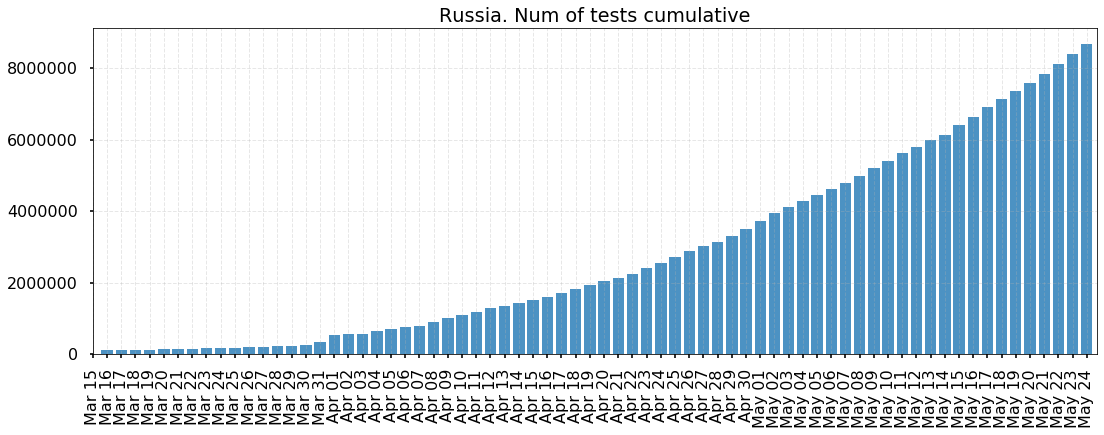

In [4]:
current_date = pd.to_datetime('today')
fig, ax = plt.subplots(figsize=(18,6))

ax.bar(data_2['date'], data_2['russia_cumulative_tests'], alpha=0.8)
ax.set_xlim(left=pd.to_datetime(CUT_DATE), right=current_date)

txt = 'Russia. Num of tests cumulative'
ax.set_title(txt)

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90)
plt.grid(which='major', linestyle='--', linewidth=1, alpha=0.3)

plt.savefig('pictures/russia_num_tests_cumulative.png')

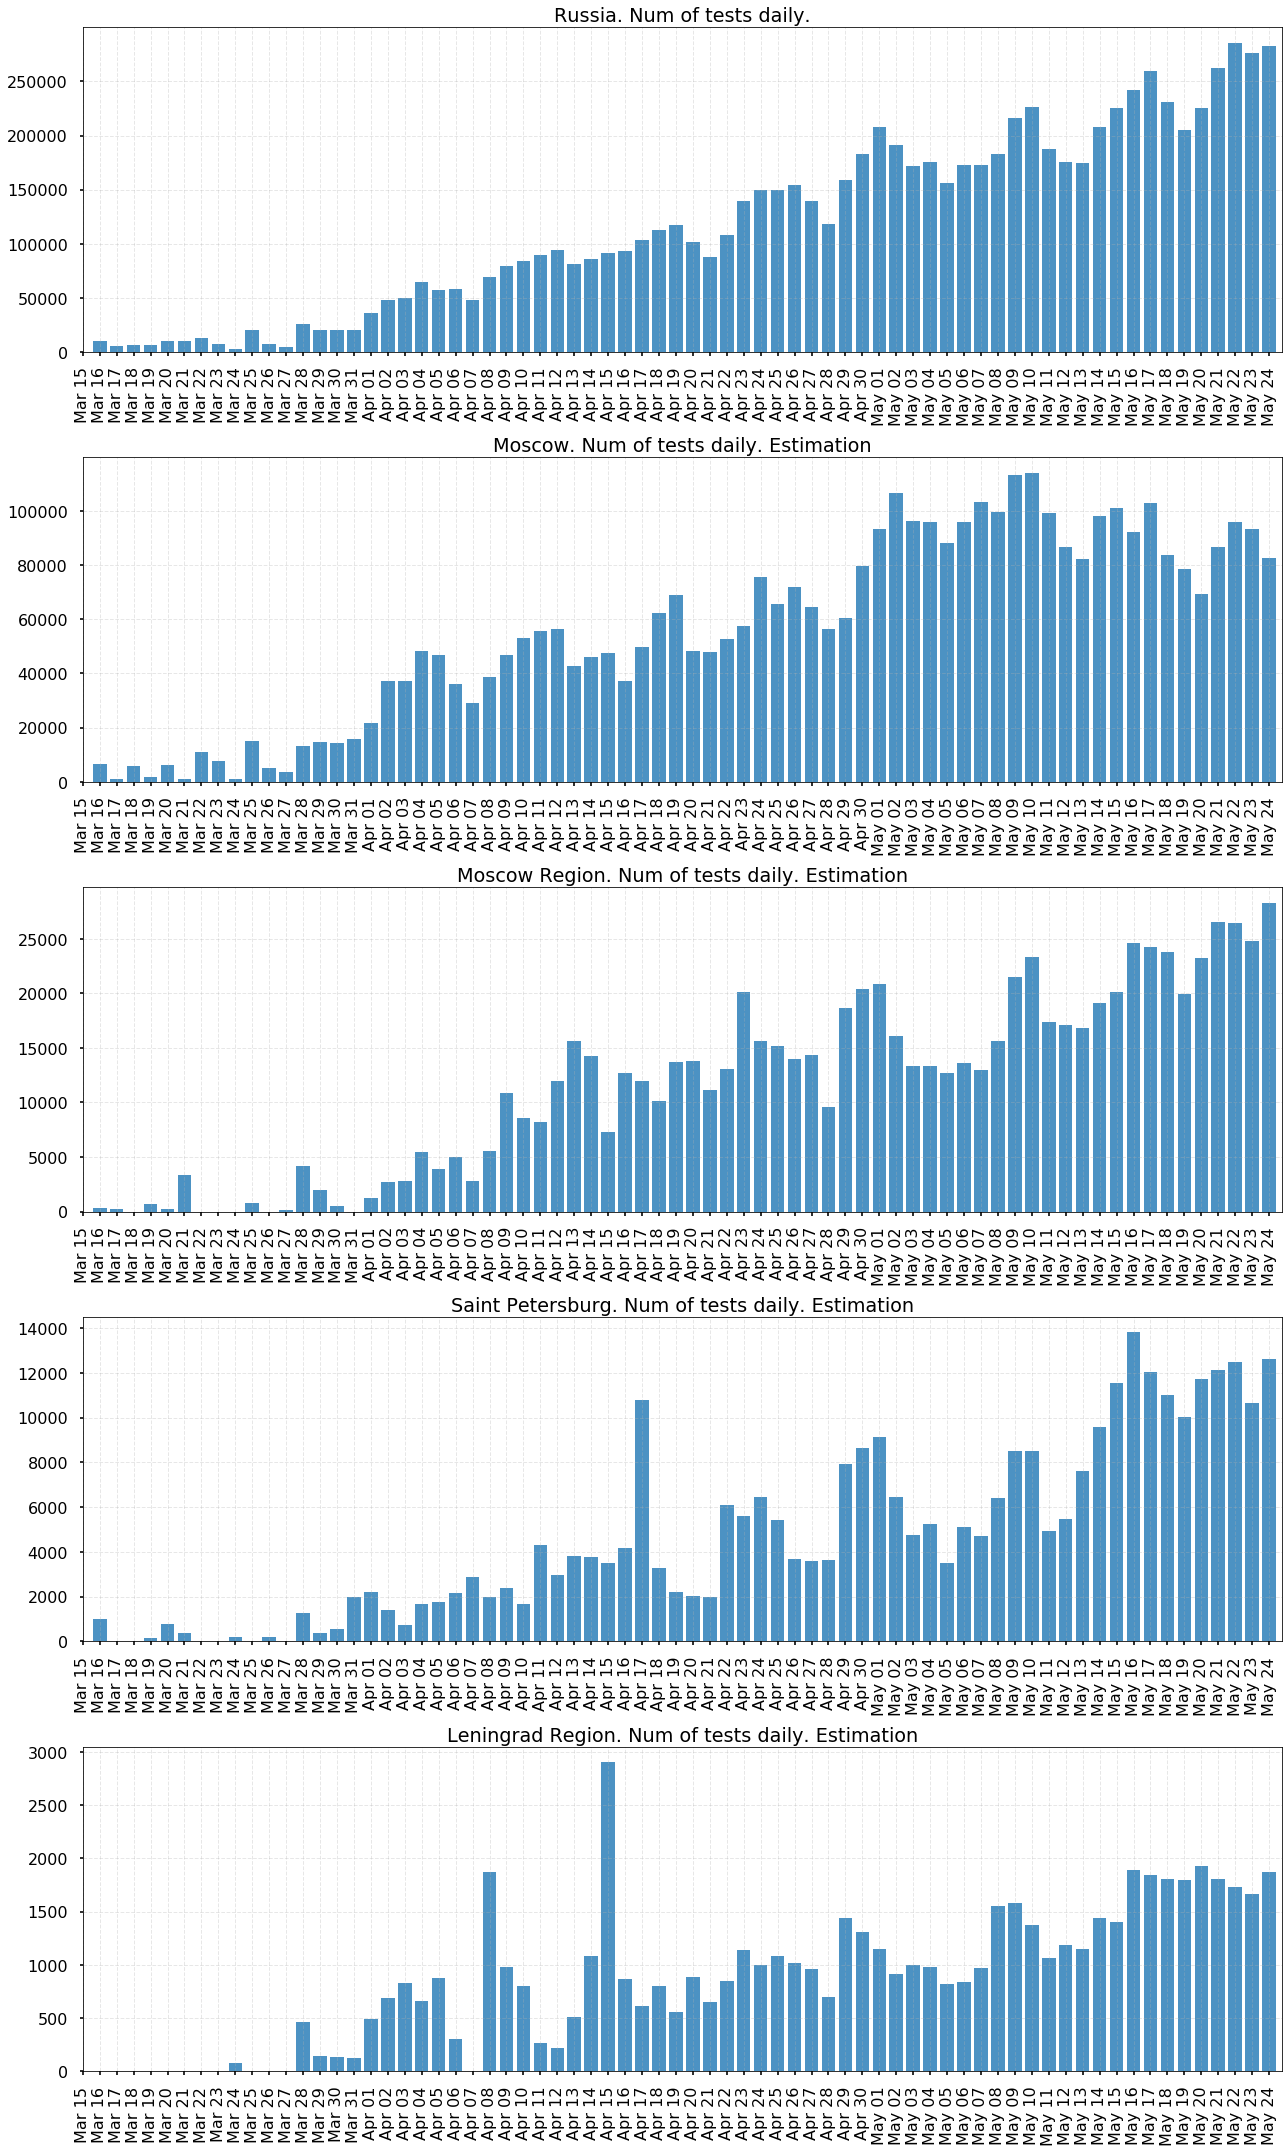

In [5]:
tests_cols = {
    'russia_new_tests': 'Russia',
    'moscow_tests_daily':'Moscow',
    'mr_tests_daily':'Moscow Region',
    'spb_tests_daily':'Saint Petersburg',
    'lr_tests_daily':'Leningrad Region'
}
current_date = pd.to_datetime('today')
fig, ax = plt.subplots(ncols=1, nrows=len(tests_cols), figsize=(18, 6*len(tests_cols)))

for ind, col in enumerate(tests_cols):   
    ax[ind].bar(data_2['date'], data_2[col], alpha=0.8)
    ax[ind].set_xlim(left=pd.to_datetime(CUT_DATE), right=current_date)
    
    # title 
    if col == 'russia_new_tests':
        txt = f'{tests_cols[col]}. Num of tests daily.'
    else:
        txt = f'{tests_cols[col]}. Num of tests daily. Estimation'
    ax[ind].set_title(txt)
    
    # ticks
    ax[ind].xaxis.set_major_locator(mdates.DayLocator())
    ax[ind].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[ind].xaxis.set_tick_params(rotation=90)
    ax[ind].grid(which='major', linestyle='--', linewidth=1, alpha=0.3)

plt.tight_layout()
plt.savefig('pictures/num_tests_by_region.png')

### 2.2. New cases

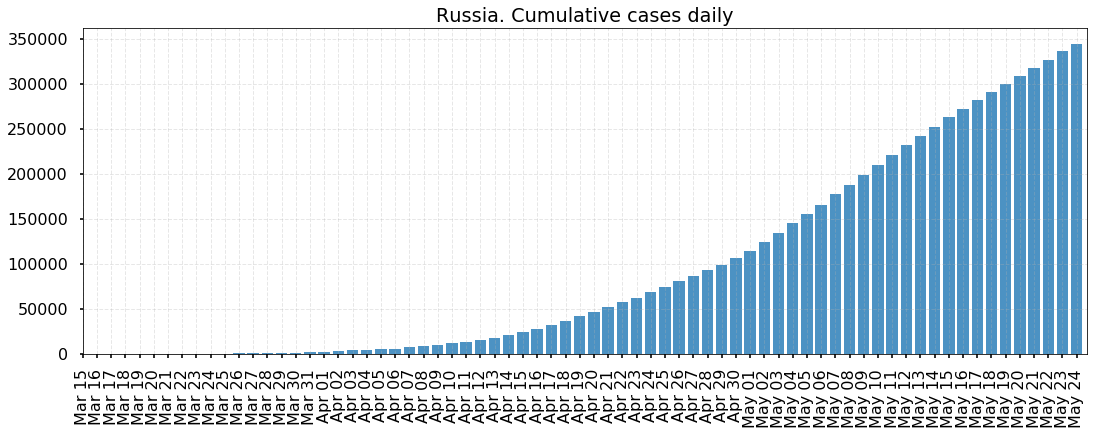

In [6]:
current_date = pd.to_datetime('today')
fig, ax = plt.subplots(figsize=(18,6))

ax.bar(data_2['date'], data_2['russia_cumulative_cases'], alpha=0.8)
ax.set_xlim(left=pd.to_datetime(CUT_DATE), right=current_date)

txt = 'Russia. Cumulative cases daily'
ax.set_title(txt)

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90)
plt.grid(which='major', linestyle='--', linewidth=1, alpha=0.3)

plt.savefig('pictures/russia_num_new_cases_daily_cumulative.png')

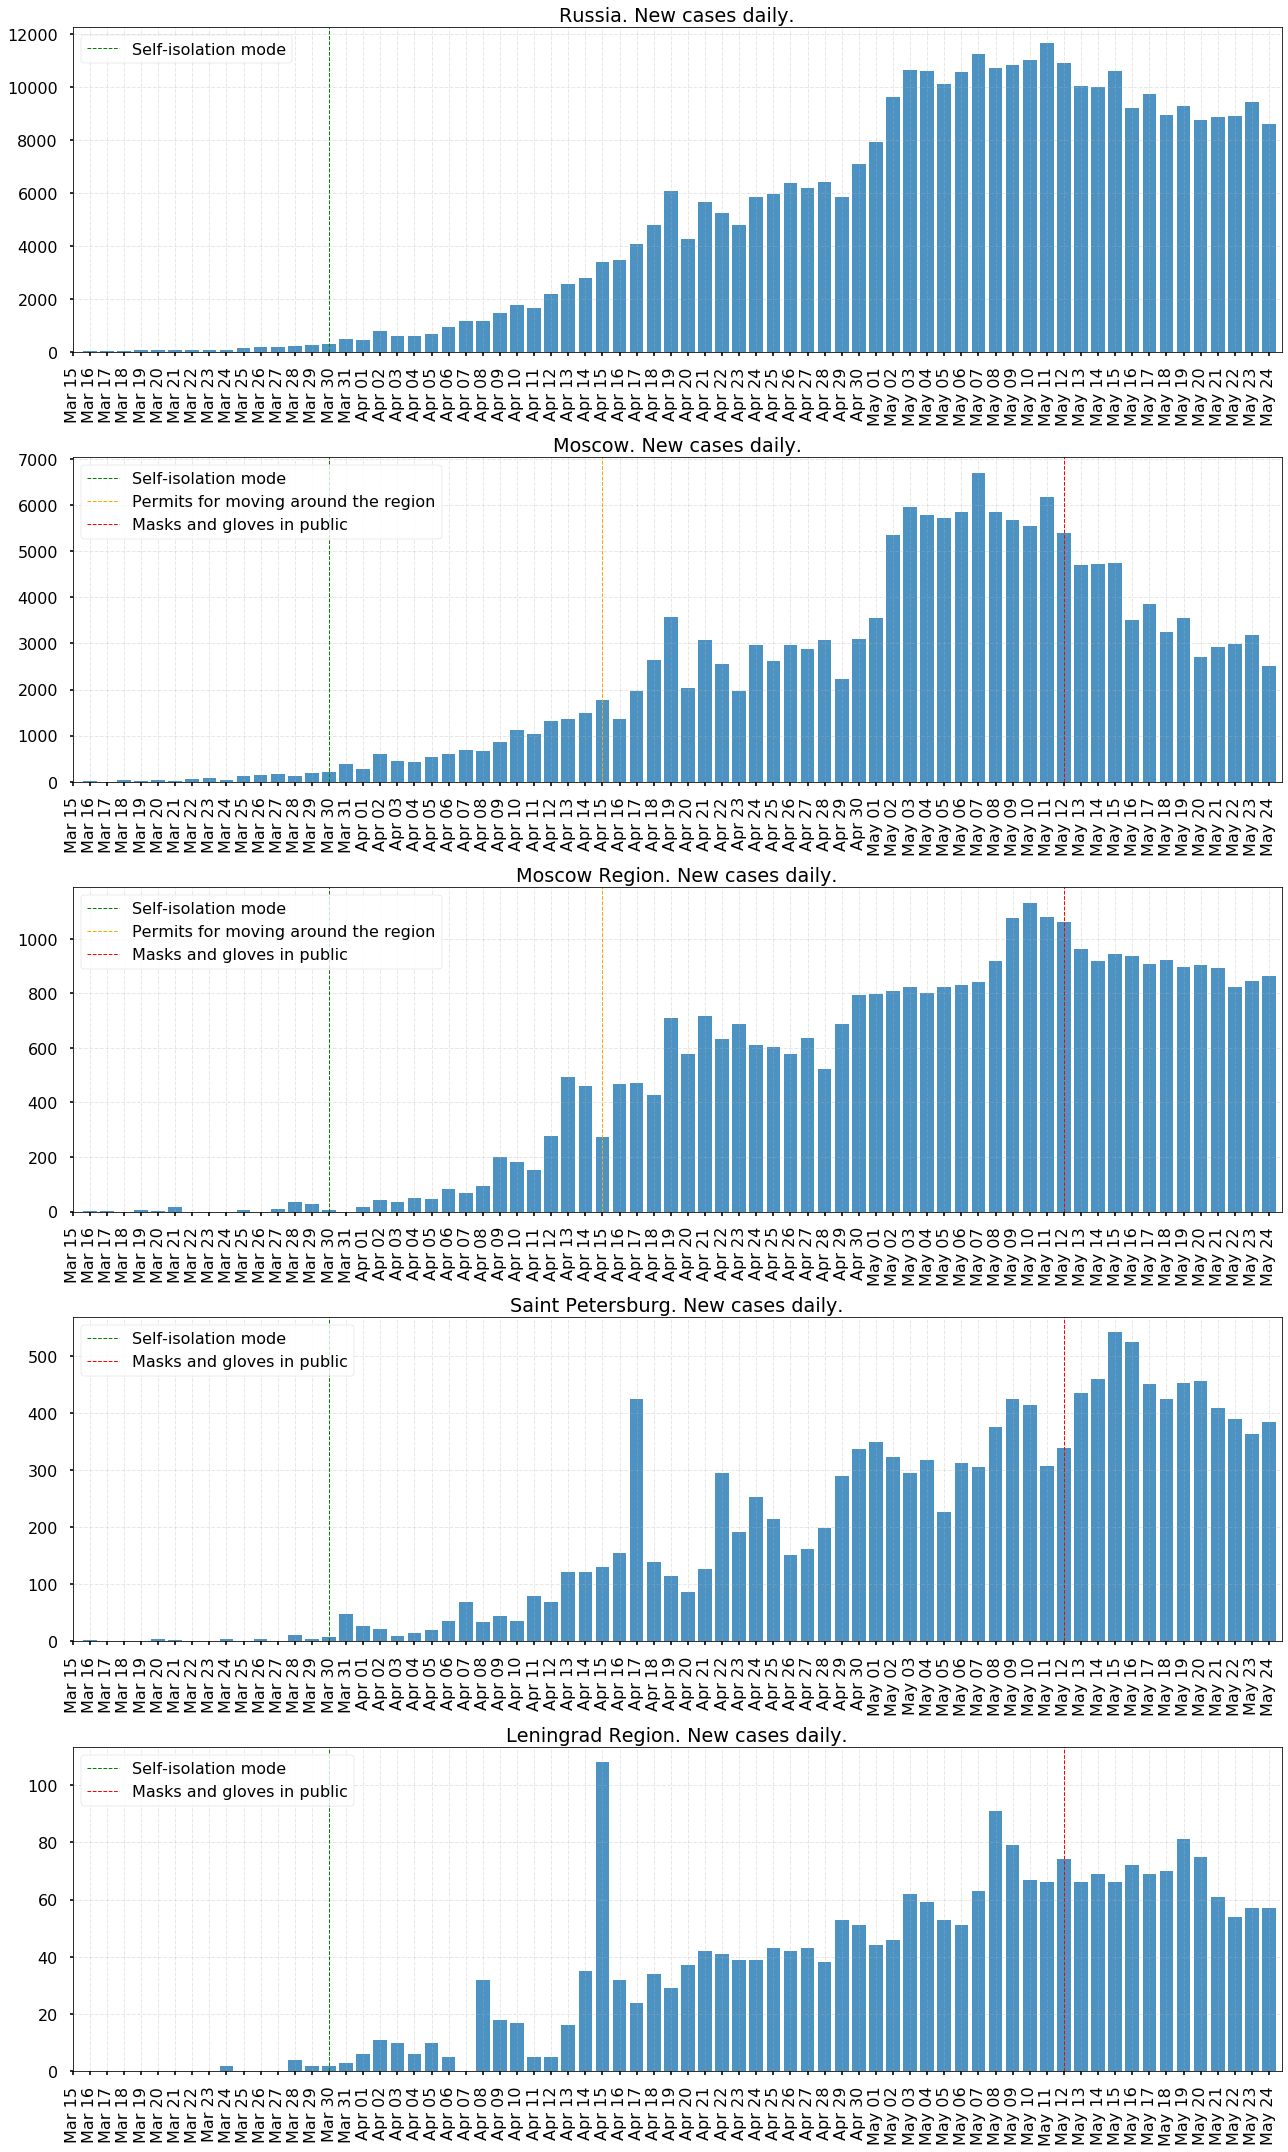

In [7]:
tests_cols = {
    'russia_new_cases': 'Russia',
    'moscow':'Moscow',
    'moscow_region':'Moscow Region',
    'saint_petersburg':'Saint Petersburg',
    'leningrad_region':'Leningrad Region'
}
current_date = pd.to_datetime('today')
fig, ax = plt.subplots(ncols=1, nrows=len(tests_cols), figsize=(18, 6*len(tests_cols)))

for ind, col in enumerate(tests_cols):   
    ax[ind].bar(data_2['date'], data_2[col], alpha=0.8)
    ax[ind].set_xlim(left=pd.to_datetime(CUT_DATE), right=current_date)
    
    # title
    txt = f'{tests_cols[col]}. New cases daily.'
    ax[ind].set_title(txt)
    
    # restrictions
    ax[ind].axvline(x=pd.to_datetime('2020-03-30'),
                    label='Self-isolation mode', 
                    linestyle='--', linewidth=1, color='g')
    if col in ['moscow', 'moscow_region']:
        ax[ind].axvline(x=pd.to_datetime('2020-04-15'),
                        label='Permits for moving around the region', 
                        linestyle='--', linewidth=1, color='orange')
    if col != 'russia_new_cases':
        ax[ind].axvline(x=pd.to_datetime('2020-05-12'),
                        label='Masks and gloves in public', 
                        linestyle='--', linewidth=1, color='r')
    # ticks
    ax[ind].xaxis.set_major_locator(mdates.DayLocator())
    ax[ind].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[ind].xaxis.set_tick_params(rotation=90)
    ax[ind].grid(which='major', linestyle='--', linewidth=1, alpha=0.3)
    ax[ind].legend(loc=2)
    
plt.tight_layout()
plt.savefig('pictures/num_new_cases_by_region.png')

### 2.3. Detection rate in Russia

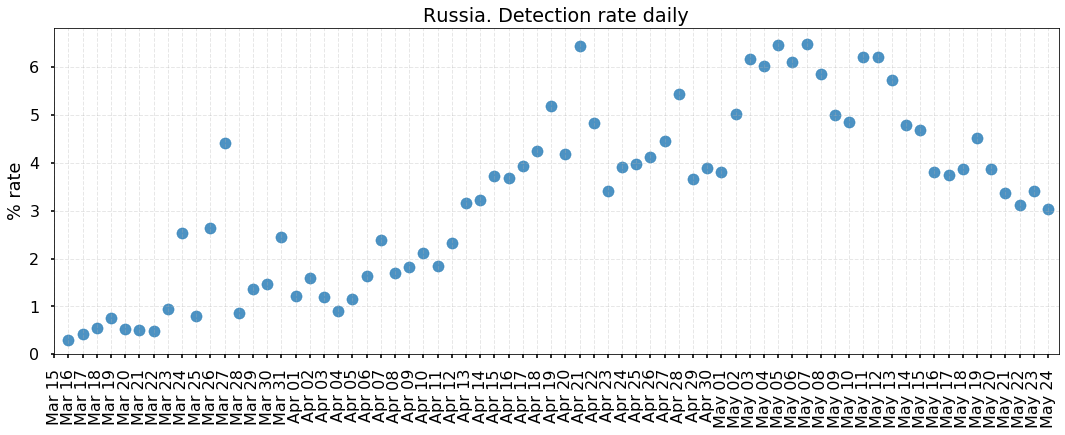

In [8]:
current_date = pd.to_datetime('today')
fig, ax = plt.subplots(figsize=(18,6))

ax.scatter(data_2['date'], data_2['russia_detection_rate']*100, alpha=0.8)

ax.set_xlim(left=pd.to_datetime(CUT_DATE), right=current_date)
ax.set_ylim(bottom=0)

txt = 'Russia. Detection rate daily'
ax.set_title(txt)

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks(rotation=90)
plt.grid(which='major', linestyle='--', linewidth=1, alpha=0.3)
plt.ylabel('% rate')

plt.savefig('pictures/russia_detection_rate_daily.png')